Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Nathalie van Sterkenburg (11037466) <br>
Romy Meester (11140046)

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

In [19]:
import numpy as np
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

[ 3. 11. 29. 32. 47. 63. 73. 99.]
[[ 3.  1.]
 [11.  1.]
 [29.  1.]
 [32.  1.]
 [47.  1.]
 [63.  1.]
 [73.  1.]
 [99.  1.]]
[[9.000e+00 3.000e+00 1.000e+00]
 [1.210e+02 1.100e+01 1.000e+00]
 [8.410e+02 2.900e+01 1.000e+00]
 [1.024e+03 3.200e+01 1.000e+00]
 [2.209e+03 4.700e+01 1.000e+00]
 [3.969e+03 6.300e+01 1.000e+00]
 [5.329e+03 7.300e+01 1.000e+00]
 [9.801e+03 9.900e+01 1.000e+00]]
[[2.70000e+01 9.00000e+00 3.00000e+00 1.00000e+00]
 [1.33100e+03 1.21000e+02 1.10000e+01 1.00000e+00]
 [2.43890e+04 8.41000e+02 2.90000e+01 1.00000e+00]
 [3.27680e+04 1.02400e+03 3.20000e+01 1.00000e+00]
 [1.03823e+05 2.20900e+03 4.70000e+01 1.00000e+00]
 [2.50047e+05 3.96900e+03 6.30000e+01 1.00000e+00]
 [3.89017e+05 5.32900e+03 7.30000e+01 1.00000e+00]
 [9.70299e+05 9.80100e+03 9.90000e+01 1.00000e+00]]
[array([67.6964646 , 62.56561255, 51.02119542, 49.0971259 , 39.4767783 ,
       29.21507418, 22.80150911,  6.12623993])]
[array([77.67114475, 67.0003628 , 46.79181436, 43.93535712, 31.8457888 ,
       22

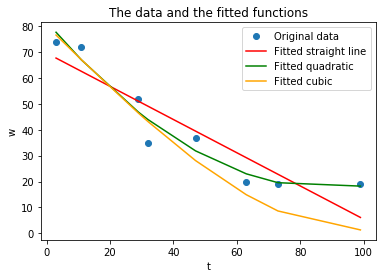

In [21]:
import matplotlib.pyplot as plt
% matplotlib inline

#Fitted functions
def f_straight_line(x,a,b): 
    return a*x + b

def f_quadratic(x,a,b,c):
    return a*x**2 + b*x + c

def f_cubic(x,a,b,c,d):
    return a*x**3 + b*x*2 + c*x + d

def functions(x,y):
    Slist = [] #Straight line
    Qlist = [] #Quadratic
    Clist = [] #Cubic
    M = np.vstack([t, np.ones(len(t))]).T

    a, b = np.linalg.lstsq(M, y, rcond=None)[0]
    c = y - (a*x**2 + b*x)
    d = y - (a*x**3 + b*x*2 + c*x)


    s = f_straight_line(x,a,b)
    q = f_quadratic(x,a,b,c)
    c = f_cubic(x,a,b,c,d)

    Slist.append(s)    
    Qlist.append(q)
    Clist.append(c)
#     Slist.reshape((8,0))#Slist.tolist()
    return Slist, Qlist, Clist

def functions2(x,y):
    print(x)
    Slist = [] #Straight line
    Qlist = [] #Quadratic
    Clist = [] #Cubic
    
    M = np.vstack([t**1, t**0]).T
    a, b = np.linalg.lstsq(M, y, rcond=None)[0]
    
    s = f_straight_line(x,a,b)
    
    M = np.vstack([t**2, t**1, t**0]).T
    a, b, c = np.linalg.lstsq(M, y, rcond=None)[0]
    
    q = f_quadratic(x,a,b,c)
    
    M = np.vstack([t**3, t**2, t**1, t**0]).T
    a, b, c, d = np.linalg.lstsq(M, y, rcond=None)[0]
    
    c = f_cubic(x,a,b,c,d)

    Slist.append(s)    
    Qlist.append(q)
    Clist.append(c)
#     Slist.reshape((8,0))#Slist.tolist()
    return Slist, Qlist, Clist


straight_line, quadratic, cubic = functions2(t,w) 
print(straight_line[0])
print(quadratic[0])
print(cubic[0])

#Plot the data and fitted functions
plt.figure()
plt.plot(t, w, 'o', label='Original data')
plt.plot(t, straight_line[0], 'r', label='Fitted straight line')
plt.plot(t, quadratic[0], 'g', label='Fitted quadratic')
plt.plot(t, cubic[0], color='orange', label='Fitted cubic')

plt.title('The data and the fitted functions')
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [22]:
import numpy as np
from numpy import linalg 

def condition_number(M):
    CNlist = []
    for m in M:
        cn = linalg.cond(m)
        CNlist.append(cn)
    return CNlist

def matrix(x): 
    A = np.vander(x)
    cn = condition_number(A)
    return cn    

cn_t = matrix(t)
cn_w = matrix(w)

print('The condition number of the associated Vandermonde matrix of t is: %.2f' %(cn_t))
print('The condition number of the associated Vandermonde matrix of w is: %.2f' %(cn_w))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [44]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

a=-2.64, b=0.14, c=0.55, d=3.22, e=-0.43


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


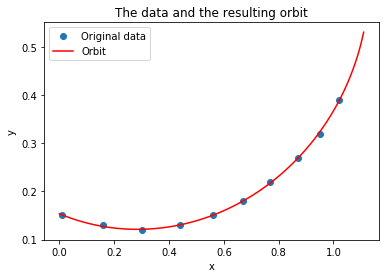

In [53]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def f_cartesian(x,y,a,b,c,d,e):
    return a*y**2 + b*x*y + c*x + d*y + e - x**2

def function(x,y):
    M = np.vstack([y**2, x*y, x, y, np.ones(len(x))]).T
    return np.linalg.lstsq(M, x**2)[0]

def determineOrbit(xlist,ylist):

    a, b, c, d, e = function(xlist,ylist)
    
    print("a=%.2f, b=%.2f, c=%.2f, d=%.2f, e=%.2f"%(a,b,c,d,e))

    xvalues = []
    yvalues = []

    for xnow in np.arange(0,1.11,0.01):

        xvalues.append(xnow)

        coeff = np.roots([a, b*xnow + d, c*xnow + e - xnow**2])

        yvalues.append(coeff[1])
        
    return xvalues, yvalues

xvalues, yvalues = determineOrbit(x,y)
        
#Plot the data and resulting orbit
plt.figure()
plt.plot(x,y, 'o', label='Original data')
plt.plot(xvalues, yvalues, 'r', label='Orbit')

plt.title('The data and the resulting orbit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

[1.02 0.95 0.87 0.77 0.67 0.56 0.44 0.3  0.16 0.01]
[1.02 0.95 0.87 0.77 0.67 0.56 0.44 0.3  0.16 0.01]
[1.01892185 0.95224596 0.87289413 0.76846184 0.67416123 0.55825511
 0.44027825 0.30013708 0.15635424 0.01141265]
a=-2.99, b=0.52, c=0.49, d=3.02, e=-0.39


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


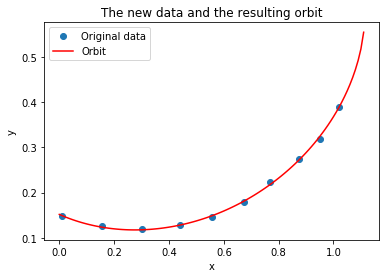

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random
% matplotlib inline

xnew = np.array(x, dtype=np.float)
ynew = np.array(y, dtype=np.float)

#xnew = x
#ynew = y
print(xnew)
print(x)

for i in range(len(xnew)):
    
    xnew[i] += random.random() * 0.01 - 0.005
    ynew[i] += random.random() * 0.01 - 0.005
    
    #xnew.append(x[i] + random.random() * 0.01 - 0.005)
    #ynew.append(y[i] + random.random() * 0.01 - 0.005)
print(xnew)
xvalues, yvalues = determineOrbit(xnew,ynew)

#Plot the data and resulting orbit
plt.figure()
plt.plot(xnew,ynew, 'o', label='Original data')
plt.plot(xvalues, yvalues, 'r', label='Orbit')

plt.title('The new data and the resulting orbit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## (c)
Can you explain this behaviour?

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?